In [1]:
import sys, time
sys.path.insert(0, "..")

import torch
import matplotlib.pyplot as plt
import numpy as np
from src.pinns import PINN
from src.utils.visualization import TrainingDataVisualizer as TDV

In [2]:
# reproducibility
torch.manual_seed(31)

In [3]:
# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# 2) instantiate PINN
model = PINN(
    input_dim=2,
    hidden_dim=50,
    output_dim=1,
    num_hidden_layers=4,
    Nd=50, # number of boundary points
    Nc=1000, # number of collocation points
    device=device
)
model.to(device)
print("Using device:", next(model.parameters()).device)


Using device: cpu


In [5]:
# grab the data generated in PINN.__init__
X_train_Nu = model.X_train_Nu
U_train_Nu = model.U_train_Nu
X_train_Nf = model.X_train_Nf

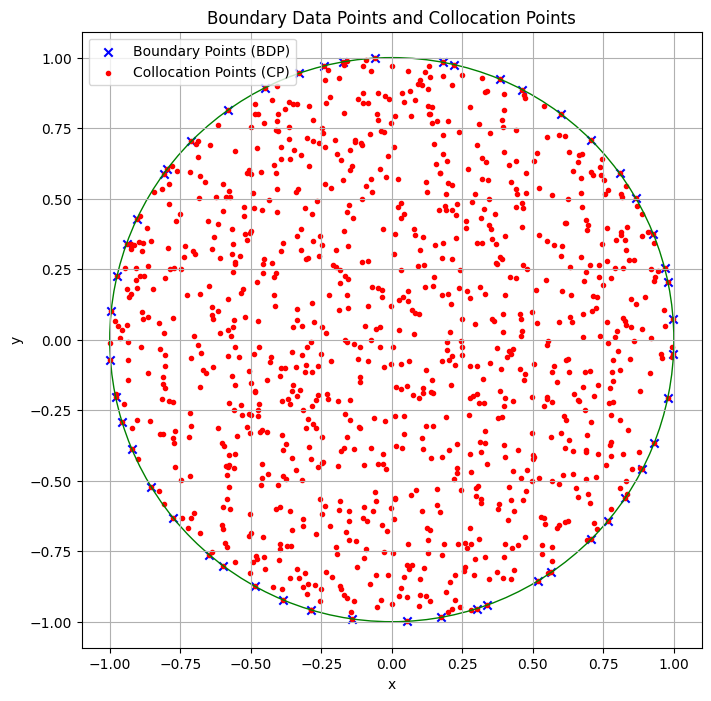

In [6]:
TDV.visualize_training_data(X_train_Nu, X_train_Nf)

In [7]:
pi = torch.tensor(np.pi, dtype=torch.float).to(device)

In [8]:
epochs = 0
loss_values1 = 1
loss_values2 = 1
error = 1
loss_values = []

In [9]:
start_time = time.time()
while loss_values2 > 1e-4:
    loss = model(p=2, bc_weight=10)
    loss_values.append(loss.item())

    if epochs == 0:
        print("Training Loss ----- Test Loss")
        loss_values1 = 1
        loss_values2 = loss_values[0]
        error = ((loss_values2 - loss_values1)**2)
    else:
        loss_values1 = loss_values[epochs-1]
        loss_values2 = loss_values[epochs]
        error = ((loss_values2 - loss_values1)**2)

    if epochs % 500 == 0:
        print(epochs,'-',loss)

    epochs += 1

Training Loss ----- Test Loss
0 - tensor(1.0269, grad_fn=<AddBackward0>)
500 - tensor(0.0002, grad_fn=<AddBackward0>)
1000 - tensor(0.0002, grad_fn=<AddBackward0>)
1500 - tensor(0.0001, grad_fn=<AddBackward0>)


In [10]:
elapsed = time.time() - start_time
print('Training time: %.2f' % (elapsed))

Training time: 60.10


In [11]:
loss_values

[1.0268833637237549,
 0.9978007674217224,
 0.9709402322769165,
 0.944786548614502,
 0.9178572297096252,
 0.8890267610549927,
 0.857634961605072,
 0.8232063055038452,
 0.7852319478988647,
 0.7432056069374084,
 0.6968513131141663,
 0.6461382508277893,
 0.591067373752594,
 0.5316339731216431,
 0.4682826101779938,
 0.4021972417831421,
 0.33555781841278076,
 0.27167224884033203,
 0.21406640112400055,
 0.1677224338054657,
 0.13935433328151703,
 0.13155247271060944,
 0.14287349581718445,
 0.16213785111904144,
 0.17537717521190643,
 0.1736828237771988,
 0.16128136217594147,
 0.1365799754858017,
 0.1089419573545456,
 0.09131870418787003,
 0.07462222874164581,
 0.06757232546806335,
 0.06542311608791351,
 0.06569034606218338,
 0.06879974156618118,
 0.07030398398637772,
 0.07227793335914612,
 0.07054052501916885,
 0.06879152357578278,
 0.06355026364326477,
 0.05869639664888382,
 0.05215568467974663,
 0.04666399583220482,
 0.04203267768025398,
 0.03813306242227554,
 0.03689117729663849,
 0.03642249